<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/SGD_M_Vs_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

In [2]:
def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [3]:
def grad_func_x1(x1):
  return 0.2*x1

In [4]:
def grad_func_x2(x2):
  return 4*x2

#PID

In [5]:
def PID_Otimizer(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 #parameters
  gamma = 0.9	

  log = [] # lists to store learning process

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  t=0

  while(1):
    t=t+1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = gamma*prev_mt_x1 + lr*grad_x1
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1
    prev_grad_x1 = grad_x1

    mt_x2 = gamma*prev_mt_x2 + lr*grad_x2
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2
    prev_grad_x2 = grad_x2

    log.append((x1,x2))

    x1_prev = x1
    x2_prev = x2

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1_prev == x1 and x2_prev == x2):
      break

  return x1, x2, log

#SGD-M

In [6]:
def sgd_m(lr=0.05):
  x1, x2 = -10, -10
  log = []
  gamma = 0.9


  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, mt_x2 = 0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  t=0

  while(1):
    t=t+1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = gamma*prev_mt_x1 + lr*grad_x1
    mt_x2 = gamma*prev_mt_x2 + lr*grad_x2


    prev_mt_x1 = mt_x1
    prev_grad_x1 = grad_x1

    

    prev_mt_x2 = mt_x2
    prev_grad_x2 = grad_x2

    log.append((x1,x2))

    x1_prev = x1
    x2_prev = x2

    x1 = x1 - mt_x1
    x2 = x2 - mt_x2

    if(x1_prev == x1 and x2_prev == x2):
      break

  return x1, x2, log

In [7]:
%%time
x1, x2, log2 = PID_Otimizer(lr=0.01, Kd=0.9)

CPU times: user 43.2 ms, sys: 2.02 ms, total: 45.3 ms
Wall time: 45.6 ms


In [8]:
%%time
x1, x2, log1 = sgd_m(lr=0.01)

CPU times: user 23 ms, sys: 2.77 ms, total: 25.8 ms
Wall time: 25.9 ms


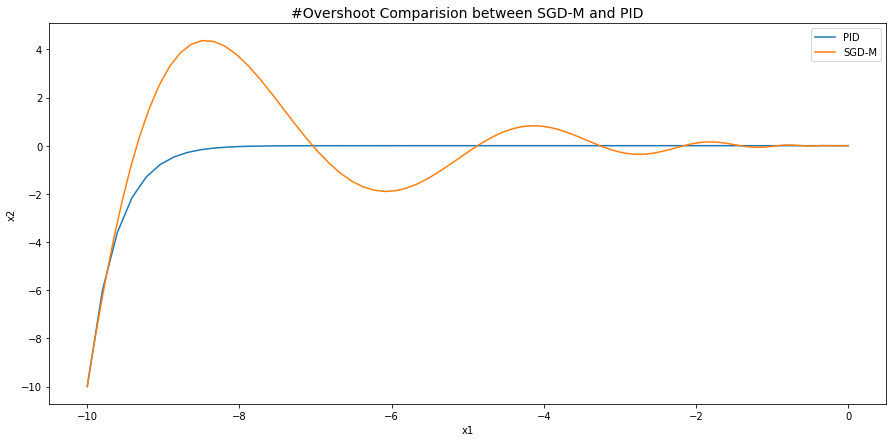

CPU times: user 279 ms, sys: 10.9 ms, total: 290 ms
Wall time: 291 ms


In [9]:
%%time
x_val_11 = [l[0] for l in log2]
y_val_11 = [l[1] for l in log2]

x_val = [l[0] for l in log1]
y_val = [l[1] for l in log1]





plt.figure(figsize=(15,7))
plt.rcParams['figure.dpi'] = 227

plt.title('#Overshoot Comparision between SGD-M and PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_11,y_val_11, label='PID')
plt.plot(x_val,y_val, label='SGD-M')

plt.legend()

plt.show()

In [10]:
%%time
x1, x2, log2 = PID_Otimizer(lr=0.01, Kd=4)

CPU times: user 79.9 ms, sys: 3.93 ms, total: 83.9 ms
Wall time: 84.1 ms


In [11]:
%time
x1, x2, log1 = sgd_m(lr=0.01)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


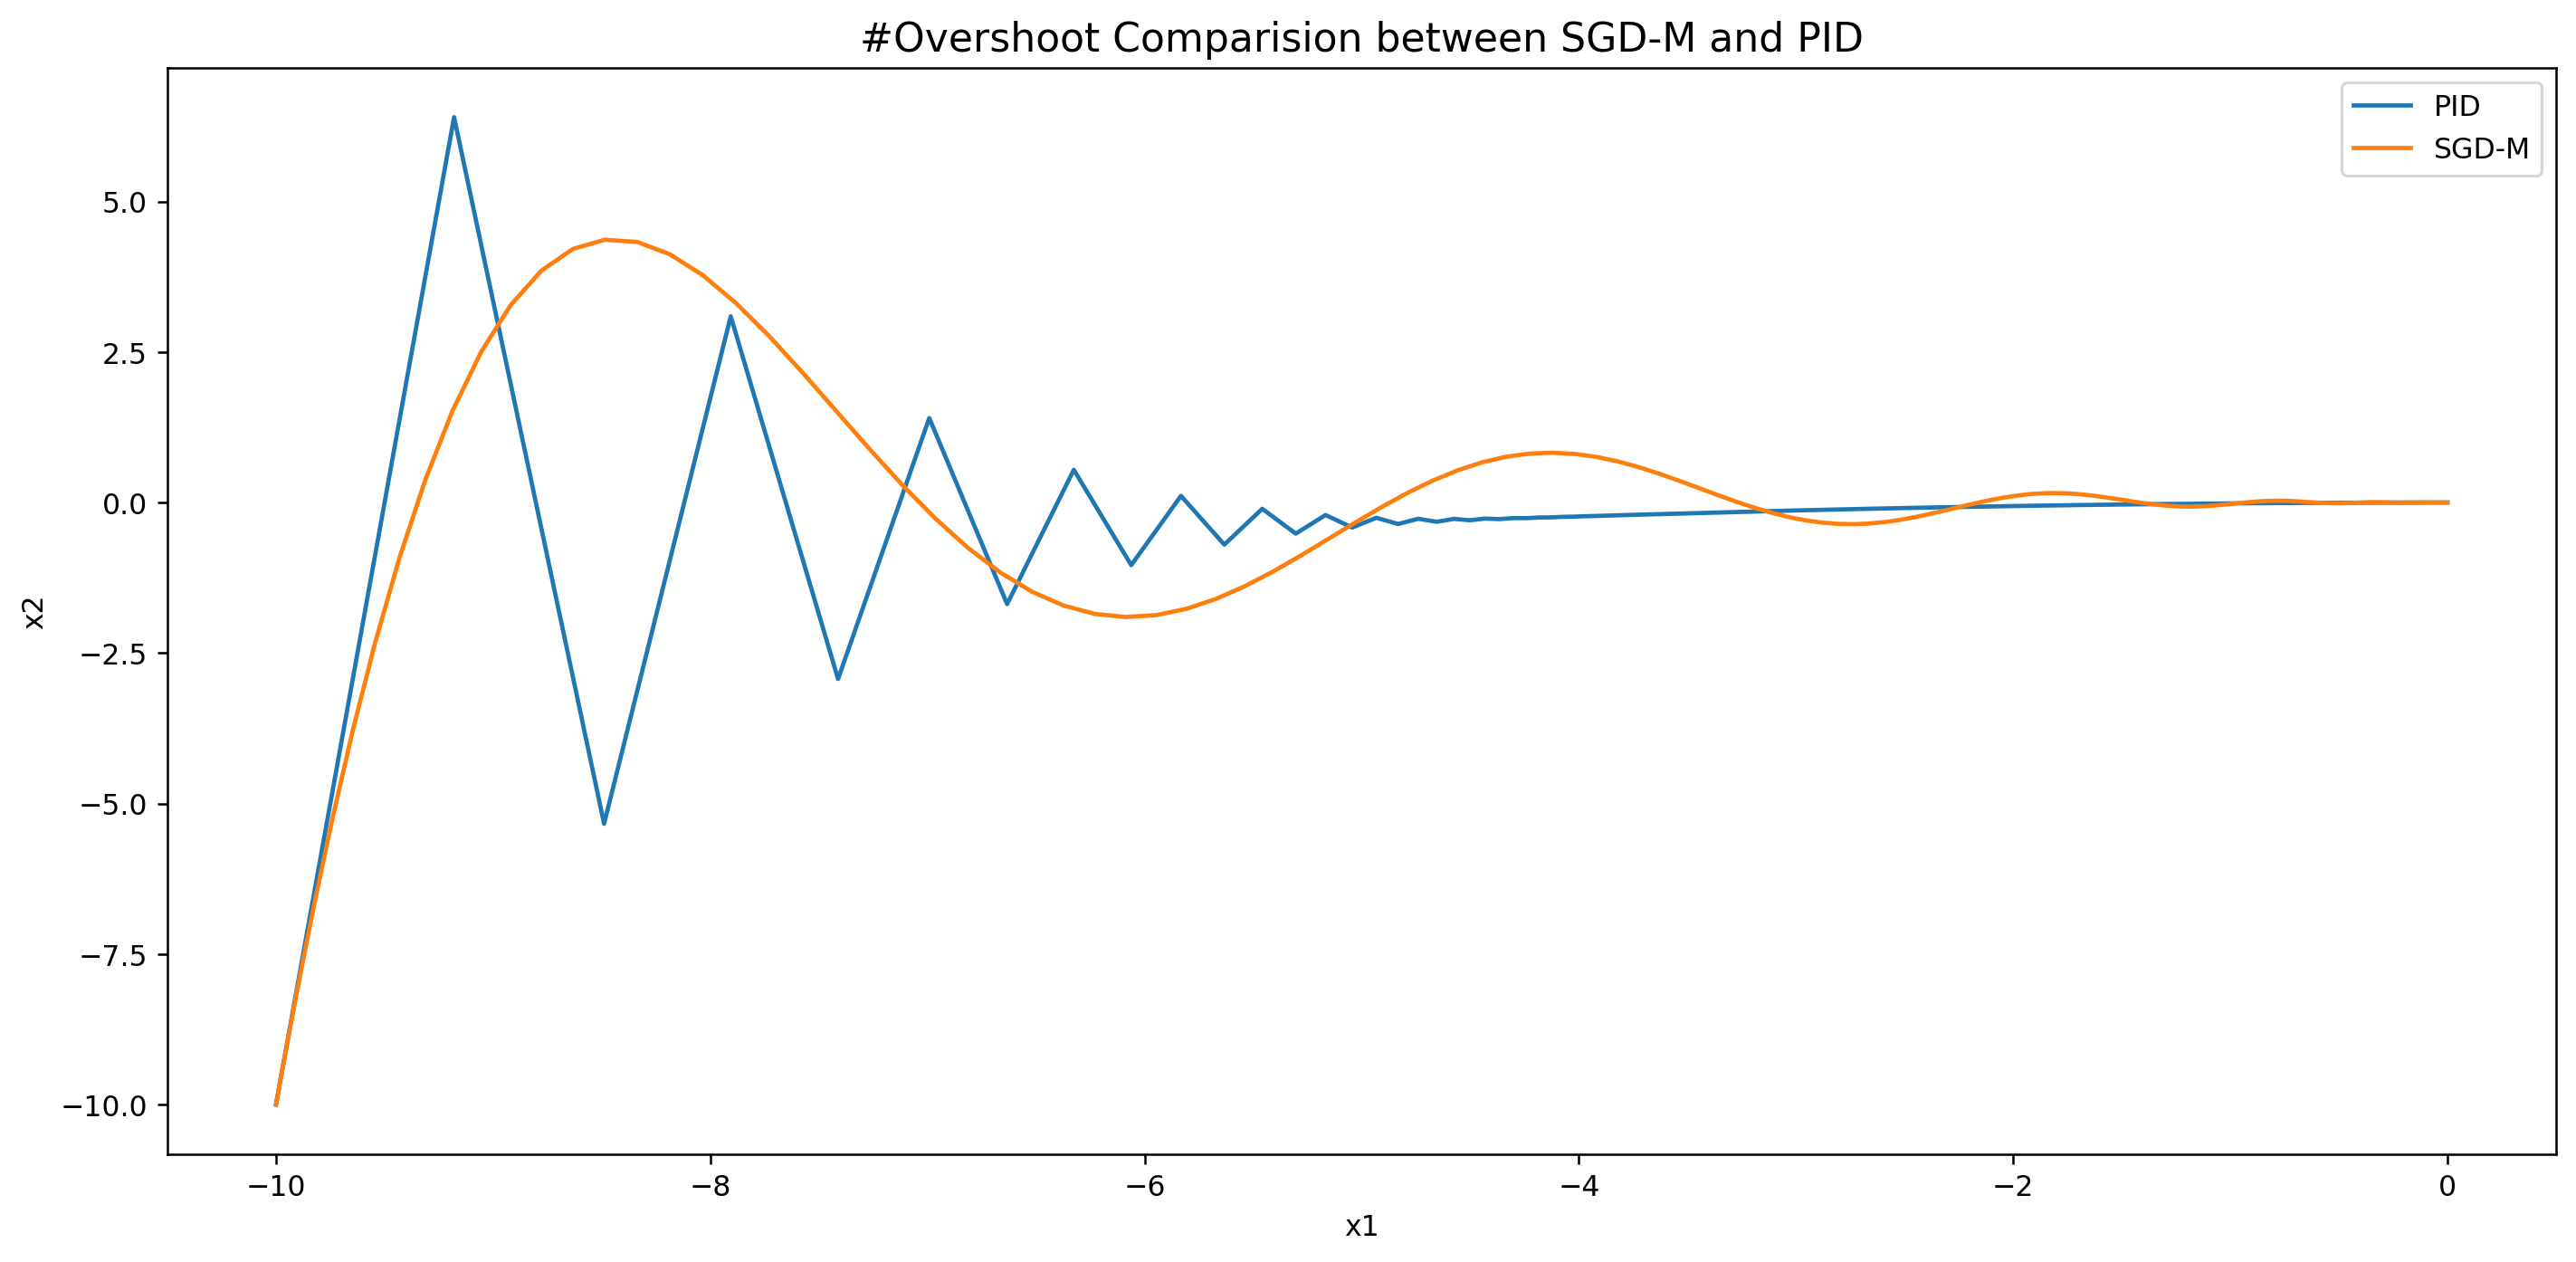

CPU times: user 789 ms, sys: 28.9 ms, total: 818 ms
Wall time: 816 ms


In [12]:
%%time
x_val_11 = [l[0] for l in log2]
y_val_11 = [l[1] for l in log2]

x_val = [l[0] for l in log1]
y_val = [l[1] for l in log1]





plt.figure(figsize=(15,7))
plt.rcParams['figure.dpi'] = 227

plt.title('#Overshoot Comparision between SGD-M and PID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_11,y_val_11, label='PID')
plt.plot(x_val,y_val, label='SGD-M')

plt.legend()

plt.show()

In [13]:
def Adaptive_PID_Ada(lr = 0.05, Kd = 0.9):
  x1, x2 = -10, -10  #parametrs
  log = []  #list to store the value of x1 and x2 i.e learning process

  gamma =0.9 # momentum parameter
  eps = 1e-8

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  vt_x1, vt_x2, prev_vt_x1, prev_vt_x2 = 0,0,0,0  #Introducing for accumulating the magnitude of the gradient

  t = 0

  while(1):    #Until Convergence
    t +=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    vt_x1 = prev_vt_x1 + grad_x1**2  #Accumulating the magnitude of the gradient w.r.t first parameters
    mt_x1 = gamma*prev_mt_x1 + (lr*grad_x1)/math.sqrt(vt_x1 + eps)
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_grad_x1 = grad_x1
    prev_vt_x1 = vt_x1
    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1

    
    vt_x2 = prev_vt_x2 + grad_x2**2  #Accumulating the magnitude of the gradient w.r.t second parameters
    mt_x2 = gamma*prev_mt_x2 + (lr*grad_x2)/math.sqrt(vt_x2 + eps)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_grad_x2 = grad_x2
    prev_vt_x2 = vt_x2
    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log

In [14]:
%%time
x1, x2, log_5 = Adaptive_PID_Ada(lr=0.01, Kd=0.9) #Kd = 0.9

CPU times: user 3.15 s, sys: 130 ms, total: 3.28 s
Wall time: 3.3 s


In [15]:
%%time
x1, x2, log_5 = Adaptive_PID_Ada(lr=0.01, Kd=4) #Kd = 0.9

CPU times: user 5.59 s, sys: 227 ms, total: 5.82 s
Wall time: 5.84 s


In [21]:
%%time
x1, x2, log_6 = Adaptive_PID_Ada(lr=0.1, Kd=0.5) #Kd = 0.9

CPU times: user 174 ms, sys: 9.98 ms, total: 184 ms
Wall time: 189 ms


In [22]:
%%time
x1, x2, log2 = PID_Otimizer(lr=0.01, Kd=0.9)

CPU times: user 43.2 ms, sys: 2.96 ms, total: 46.2 ms
Wall time: 47.5 ms
